# Mittelwert, Varianz und Histogramme

In diesem Kapitel werden wir uns um das Berechnen von Mittelwert, Varianz und Streuung kümmern, sowie dem Plotten von
Histogrammen.

## Der Mittelwert

Der Mittelwert, oder auch arithmetisches Mittel (engl. sample mean), dürfte bereits aus der Schule bekannt sein. 
Dennoch werden wir die Definition hier noch einmal wiederholen, damit die hier verwendete Notation jedem bekannt ist. 
Es gilt:

$$
\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i
$$

Wollen wir dies in Python implementieren, so gibt es verschiedene Möglichkeiten. 
Die erste und wahrscheinlich offensichtlichste ist:

In [10]:
def my_mean(x_values):
    N = len(x_values)
    summe = 0.
    
    for x in x_values:
        summe += x
    
    return summe/N

my_list = list(range(11))

my_mean(my_list)

5.0

Dieses Programm ist leicht zu lesen und macht genau das, was es soll.
Allerdings gleicht diese Herangehensweise dem Versuch, das Rad neuzuerfinden.
Für so alltägliche Probleme wie die Berechnung der Summe von Elementen in einem Container hat Python selbst bereits gelöst.
Außerdem würde man sich die Definitionen der lokalen Zwischenergebnisse `N` und `summe` gerne sparen.
Wir nutzen diese Vereinfachungen also aus bekommen einen wesentlich aufgeräuteren Code:

In [11]:
def my_simpler_mean(ls):
    return sum(ls)/len(ls)

my_simpler_mean(my_list)

5.0

In der Praxis sollten Sie zum Arbeiten mit Zahlen stets die Infrostruktur von `numpy` gegenüber einfachen Python-Listen bevorzugen.
`numpy`'s `arange` ist das direkte Äquivalent zur bereits bekannten `range`-Funktion, mit dem Unterschied, dass das Ergebnis vom Typ `numpy.ndarray` (n-dimensional array) ist.

In [12]:
import numpy as np

my_array = np.arange(11)
print(type(my_array))
np.mean(my_array)

<class 'numpy.ndarray'>


5.0

## Varianz und Streuung

Die klassische Definition der **Varianz** lautet 

$$ 
s^2 = \frac{1}{N} \sum_{i=1}^N (x_i - \bar{x})^2.
$$

Wenn Sie mit Summenzeichen umgehen können, sollten Sie in wenigen Schritten zeigen können, dass diese Definition äquivalent ist zu

$$
s^2 = \bar{x^2} - \bar{x}^2.
$$

Die **Standardabweichung** (engl. standard deviation) ist definiert als die Wurzel der Varianz, also $s$. 
Auch hier werden wir wieder die offensichtliche Implementierung angeben und dann die `numpy`-Lösung. 
Dies sieht dann wie folgt aus:

In [13]:
def my_var(x_values):
    x_bar = my_mean(x_values)

    s_squared = 0.
    for x_i in x_values:
        s_squared += (x_i - x_bar)**2

    return s_squared / len(x_values)

Diese Implementierung ist wieder sehr ähnlich zu der naiven Implementierung des Mittelwertes. 
Ähnlich wie oben können wir die Funktion vereinfachen, indem wir die vordefinierte `sum()`-Funktion nutzen.
Hierzu brauchen wir eine Lösung um mit `sum()` über die Quadrate der Einträge zu summieren anstatt über die Einträge selbst:

In [14]:
def my_simpler_var(x_values):
    x_bar = my_simpler_mean(x_values)
    s_squared = sum([(x_i - x_bar)**2 for x_i in x_values])
    return s_squared / len(x_values)

In dieser Implementierung haben wir eine sogenannte `list comprehension` genutzt. 
Dieses Tool ermöglicht es, dass man aus einer bereits gegebenen Liste eine neue Liste erstellt und gleichzeitig Operationen auf den Elementen ausführt.
Dies haben wir in obigem Beispiel ausgenutzt und haben als Elemente der neuen Liste die $(x_i - \bar{x})^2$ abgespeichert.
Anschließend haben wir dann diese Liste direkt in die Summen Funktion gesteckt und dieses Ergebnis (wie vorher) in `s_squared` gespeichert. 
Dadurch konnten wir wieder die Implementierung wesentlich kürzer gestalten. 
Interessierte können [hier](https://www.w3schools.com/python/python_lists_comprehension.asp) mehr über die `list comprehension` erfahren.

Vielleicht fällt Ihnen im obigen Beispiel auf, dass wir in der Funktion für die Varianz noch einmal die Funktion für den Mittelwert aufrufen.
Das können wir aber vermeiden indem wir die alternative Gleichung für die Varianz nutzen:

In [15]:
def my_other_var(x_values):
    N = len(x_values)
    sum_x = 0.
    sum_x_squared = 0.
    for x in x_values:
        sum_x += x
        sum_x_squared += x**2
    
    return (sum_x_squared/N - (sum_x/N)**2)

# Vergleich der drei Funktionen
print(my_var(my_list))
print(my_simpler_var(my_list))
print(my_other_var(my_list))


10.0
10.0
10.0


Die kürzeste Implementierung erfolgt aber natürlich wieder durch `numpy`. Hier erhalten wir:

In [16]:
np.var(my_list)

10.0

### Normierung der Varianz

Die obige Definition für die Varianz ist zwar die mathematisch schönste, stellt aber nicht unbedingt das beste Maß für die Streuung von Werten dar.
In der Praxis ist es üblich durch $N-1$ statt $N$ zu teilen, weil die Normalisierung mit $\frac{1}{N}$ die Streuung 'unterschätzt'. 
Spürbar ist dieser Effekt nur für kleine $N$, weil $N \approx {N-1}$, für $N \rightarrow \infty$. 
Dennoch ist es oft besser mit ${N-1}$ zu normieren, was man auch als **empirische Varianz** bezeichnet:

$$
s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2.
$$

Diese Wahl kann wie folgt motiviert werden:
Wir wollen, dass die Varianz von experimentellen Messungen etwas über die Genauigkeit (bzw. Vertrauenswürdigkeit) der Messung aussagt: je kleiner die Varianz, desto besser.
Im ersten Fall wiederholen wir eine Messung $N$ mal und bekommen immer ungefähr das gleiche Ergnis für $x$ mit geringer Streuung $s$. Das ist das beruhigend.
Im zweiten Fall messen wir nur ein einziges Mal und versuchen nie wieder das Ergebnis zu reproduzieren.
Hoffentlich ist es offensichtlich für Sie, dass das zweite Ergebnis viel weniger vertrauenerweckend ist als das erste.
Mit der unkorrigierten Varianz (Norm $N$) hätte die zweite Messung eine Standardabweichung von 0.
Die korrigierte Varianz (Norm $N-1$) bescheinigt jedoch auf eine unendlich große Standardabweichung, also eine maximale Unsicherheit des Ergebnisses.

In `numpy` können wir die Korrektur der Varianz übrigens erzwingen mit dem optionalen Funktionsargument `ddof=1`.
Bei den naiven Implementierungen sollten die nötigen Änderungen offensichtlich sein, abgesehen davon, dass die Gleichung $s^2 = \bar{x^2} - \bar{x}^2$ nur für die klassische und nicht für die empirische Varianz gilt.

In [19]:
np.var(my_list, ddof=1)

11.0

## Histogramme

Histogramme dienen der graphischen Darstellung einer Häufigkeitsverteilung eines Datensatzes. Somit bekommt man einen 
Eindruck davon, welche Werte in einem Datensatz dominant sind. Eine mögliche Anwendung ist z.B. die Visualisierung von
Spektren. Ein Beispiel (mit artifiziellen Daten) sieht in Python wie folgt aus:

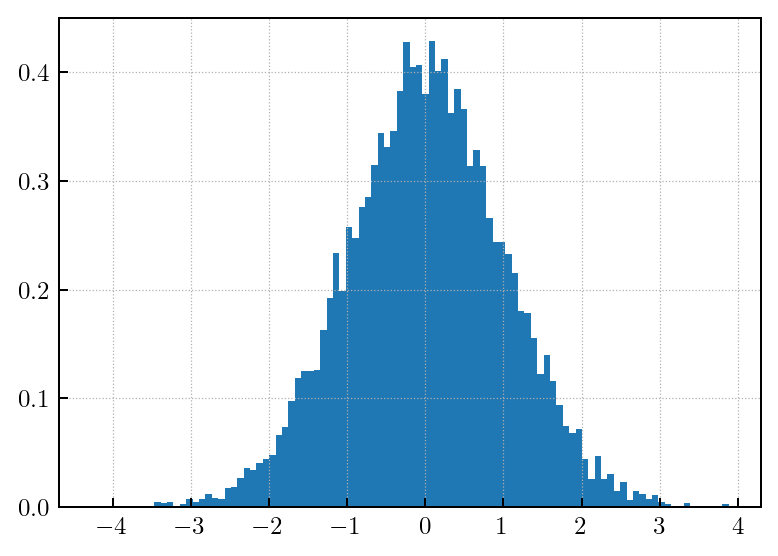

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generierung unserer Daten
np.random.seed(25763946)
data = np.random.normal(loc=0, scale=1, size=10000)

# Plotten der Daten als Histogramm
num_bins = 100
plt.hist(data, num_bins, density=True)
plt.show()

Als Datensatz haben wir 10.000 normalverteilte Zufallszahlen generiert. Neu ist hierbei, dass wir einen sogenannten `Seed`
benutzt haben. Dieser erlaubt es, dass die Berechnung deterministisch, also reproduzierbar wird.

Im zweiten Teil des Codes haben wir dann festgelegt, wieviele `bins` wir benutzen möchten. Mit `bin` meint man einfach nur
einen Balken im Histogramm. Somit sagt dann die Anzahl der `bins` aus, wieviele solcher Balken in dem Intervall der Daten 
genutzt werden sollen. Zusätzlich haben wir noch das Histogramm normalisiert, sodass die Fläche unter dem Histogramm (also 
das Integral) 1 wird und man damit das Histogramm als Verteilung ansehen kann.

```{admonition} Zufallszahlen in Computern
:class: info, dropdown
Beim Arbeiten mit Zufallszahlen mit Computern muss man immer eine Sache im Hinterkopf behalten: auch wenn immer von 
*Zufallszahlen* gesprochen wird, sind diese **nie** wirklich zufällig, weshalb es richtiger ist von 
*Pseudo*-Zufallszahlen zu sprechen.

Denn man muss hierbei beachten, dass **alle** Vorgänge in einem Computer (sofern man von potenziellen Hardware Bugs 
absieht) immer und zu jedem Zeitpunkt völlig deterministisch sind. Ebenso sind Zufallszahlen-Generatoren determinsitisch 
und produzieren nur *scheinbar* zufällige Zahlen.

Mit diesem Hintergrund wird auch klar, weshalb der oben genannte `Seed` die Berechnung reproduzierbar macht. Denn mit 
dieser Zahl initialisieren wir den Zufallszahlen-Genereator bei jedem Aufruf exakt gleich und erhalten damit bei jeder 
Ausführung das gleiche Ergebnis.
```

Damit ist dieses Kapitel abgeschlossen.